In [1]:
# %load import_setup.py
import os
os.chdir("../")
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from keras import layers, models
from keras.utils import to_categorical

from src import pipelines
from src.data.extract_data import read_true_letters


%load_ext autoreload
%autoreload 2

RANDOM_STATE = 42  # for reproducibility
np.random.seed(RANDOM_STATE)

NUM_ELECTRODES = 64
FS = 240          # Hz
NUM_TRAIN_LETTERS = 85
NUM_TEST_LETTERS = 100
NUM_ROWCOLS = 12    # col:1-6 row:7-12
NUM_REPEAT = 15
SECONDS_TO_SLICE = 0.65    # after the simulation 0.65s data is treated as a sample

DATA_DIR = "./data/raw/BCI_Comp_III_Wads_2004/"

D:\Anaconda3\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
Using TensorFlow backend.
D:\Anaconda3\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# %load data_preparation.py

A_train = pipelines.signal_mat_sub_band_norm(DATA_DIR+"Subject_A_Train")
A_test = pipelines.signal_mat_sub_band_norm(DATA_DIR + "Subject_A_Test")

A_train['signal'] = A_train['signal'].reshape([-1,NUM_ELECTRODES,A_train['signal'].shape[-1],1])
A_test['signal'] = A_test['signal'].reshape([-1,NUM_ELECTRODES,A_test['signal'].shape[-1],1]) 

A_train['label'] = to_categorical(A_train['label']) 

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(A_train['signal'], A_train['label'], test_size=0.05,
                                                  random_state=RANDOM_STATE, stratify=A_train['label'])

A_test_true_letters = read_true_letters(DATA_DIR+"A_test_labels.txt")


In [4]:
from src.models.PAMI import CNN_1_P300_PAMI_BCIIII
model_PAMI = CNN_1_P300_PAMI_BCIIII(Ns = 10,seconds_to_slice=SECONDS_TO_SLICE)
model_PAMI.compile(optimizer = 'sgd',loss = 'binary_crossentropy',metrics = ['acc', 'mse'])

In [5]:
from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor = "val_mean_squared_error",patience = 3)

In [6]:
model_PAMI.fit(x = X_train, y = y_train, batch_size=32, epochs = 1000, callbacks = [earlystopping], 
              validation_data = [X_val,y_val])

Train on 14535 samples, validate on 765 samples
Epoch 1/1000
14535/14535 [==============================] - 78s - loss: 0.4536 - acc: 0.8320 - mean_squared_error: 0.1404 - val_loss: 0.4467 - val_acc: 0.8327 - val_mean_squared_error: 0.1379
Epoch 2/1000
14535/14535 [==============================] - 4s - loss: 0.4428 - acc: 0.8334 - mean_squared_error: 0.1367 - val_loss: 0.4422 - val_acc: 0.8327 - val_mean_squared_error: 0.1366
Epoch 3/1000
14535/14535 [==============================] - 4s - loss: 0.4381 - acc: 0.8334 - mean_squared_error: 0.1354 - val_loss: 0.4388 - val_acc: 0.8327 - val_mean_squared_error: 0.1355
Epoch 4/1000
14535/14535 [==============================] - 4s - loss: 0.4340 - acc: 0.8334 - mean_squared_error: 0.1342 - val_loss: 0.4346 - val_acc: 0.8327 - val_mean_squared_error: 0.1344
Epoch 5/1000
14535/14535 [==============================] - 4s - loss: 0.4296 - acc: 0.8334 - mean_squared_error: 0.1329 - val_loss: 0.4301 - val_acc: 0.8327 - val_mean_squared_error: 0.1

In [7]:
from src.pipelines import PARADIGM, testing_pipeline
model_PAMI_scores = testing_pipeline(A_test['signal'],A_test['code'],model_PAMI,"all",PARADIGM,
                                    A_test_true_letters)

In [8]:
model_PAMI_scores

[0.17,
 0.36,
 0.5,
 0.56,
 0.63,
 0.68,
 0.69,
 0.78,
 0.82,
 0.83,
 0.83,
 0.86,
 0.86,
 0.92,
 0.92]

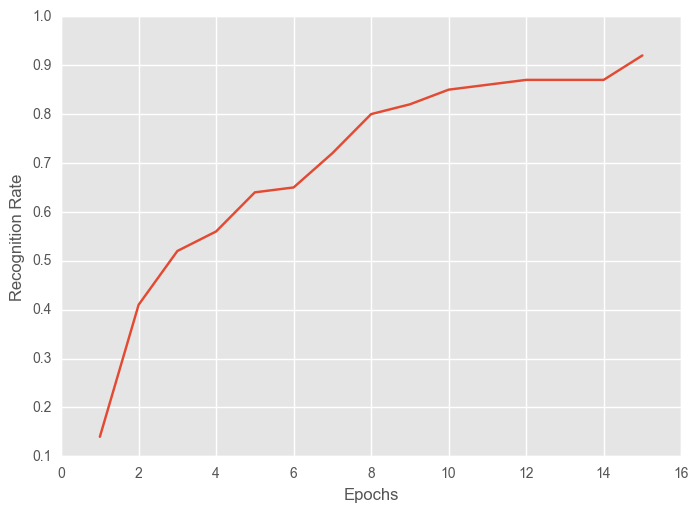

In [18]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.plot(np.arange(15)+1,model_PAMI_scores)
plt.xlabel("Epochs")
plt.ylabel("Recognition Rate")
plt.grid(True)

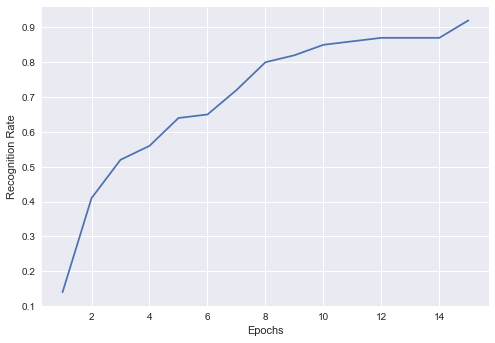

In [12]:
plt.plot(np.arange(15)+1,model_PAMI_scores)
plt.xlabel("Epochs")
plt.ylabel("Recognition Rate")
plt.grid(True)

In [15]:
plt.style.available

['seaborn-muted',
 'seaborn-talk',
 'seaborn-dark',
 'bmh',
 'seaborn-whitegrid',
 'seaborn-dark-palette',
 'dark_background',
 'grayscale',
 'seaborn-ticks',
 'classic',
 'seaborn-deep',
 'seaborn-colorblind',
 'seaborn-bright',
 'seaborn-notebook',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn',
 'seaborn-darkgrid',
 'ggplot',
 'seaborn-paper',
 '_classic_test',
 'fivethirtyeight',
 'seaborn-white']